#### Data
* [AC Transit GTFS .zip](http://www.actransit.org/planning-focus/data-resource-center/)


#### Service resources:
* [AC Transit service design standards](http://www.actransit.org/wp-content/uploads/board_policies/BP%20545%20-%20Service%20Standards%20&%20Design-1.pdf)


#### Hexbin resouces:
* [Matplotlib hexbin help](https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#hexbin)
* exporting hexbin to image --> ?
* [Image overlay in folium](https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/ImageOverlay.ipynb)

## Import packages and data

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd

import folium
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
calendar = pd.read_csv("../data/calendar.txt")
calendar_dates = pd.read_csv("../data/calendar_dates.txt")
routes = pd.read_csv("../data/routes.txt")
shapes = pd.read_csv("../data/shapes.txt")
stop_times = pd.read_csv("../data/stop_times.txt")
stops = pd.read_csv("../data/stops.txt")
trips = pd.read_csv("../data/trips.txt")

In [3]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,2003CV-D2-Weekday-01,1,1,1,1,1,0,0,20200331,20200612
1,2003CV-D2-Weekday-01-1,1,1,1,1,0,0,1,20200330,20200611
2,2003CV-D2-Saturday-01,0,0,0,0,0,1,0,20200404,20200613
3,2003CV-D2-Saturday-01-1,0,0,0,0,1,0,0,20200403,20200612
4,2003CV-D2-Sunday-01,0,0,0,0,0,0,1,20200405,20200607


In [4]:
calendar_dates.head()

,service_id,date,exception_type
0,2003CV-D2-Weekday-01,20200525,2
1,2003CV-D2-Weekday-01-1,20200524,2
2,2003CV-D2-Sunday-01,20200525,1
3,2003CV-D2-Sunday-01-1,20200524,1
4,2003CV-D3-Weekday-01,20200525,2


In [5]:
routes.head()

,route_id,route_short_name,route_long_name,route_desc,route_type,route_url
0,1,1,International - E. 14th,NaN,3,NaN
1,10,10,E. 14th St. - Mission,NaN,3,NaN
2,12,12,Dtn. Oakland\Dtn. Berkeley\ Gilman St.,NaN,3,NaN
3,14,14,14th St - San Antonio - High St,NaN,3,NaN
4,18,18,Solano - Shattuck - MLK Jr.,NaN,3,NaN


In [6]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,10030,37.803356,-122.275275,10001
1,10030,37.803203,-122.274899,10002
2,10030,37.803145,-122.274729,10003
3,10030,37.803099,-122.274605,10004
4,10030,37.802785,-122.273814,10005


In [38]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,65,2003CV-D2-Saturday-01,12888070,EUCLID,0,103917207,650092
1,65,2003CV-D2-Saturday-01,11903070,EUCLID,0,103917207,650092
2,65,2003CV-D2-Saturday-01,9514070,EUCLID,0,103917207,650092
3,65,2003CV-D2-Saturday-01,6445070,EUCLID,0,103917207,650092
4,65,2003CV-D2-Saturday-01,3614070,EUCLID,0,103917207,650092


In [7]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,timepoint
0,12888070,07:30:00,07:30:00,278,1,0,0,1
1,12888070,07:31:00,07:31:00,5875,2,0,0,0
2,12888070,07:33:00,07:33:00,575,3,0,0,0
3,12888070,07:34:00,07:34:00,787,4,0,0,0
4,12888070,07:35:00,07:35:00,511,5,0,0,0


In [8]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,2,52246.0,8th St & Portola Av,NaN,37.768814,-122.272992,NaN,NaN,0,NaN
1,3,57793.0,8th St & Portola Av,NaN,37.768993,-122.272798,NaN,NaN,0,NaN
2,5584,56707.0,1105 Atlantic Av,NaN,37.780272,-122.264015,NaN,NaN,0,NaN
3,5585,57796.0,Atlantic Av & Challenger Dr,NaN,37.781066,-122.270060,NaN,NaN,0,NaN
4,5586,54332.0,Atlantic Av & Triumph Dr,NaN,37.780799,-122.266125,NaN,NaN,0,NaN


In [22]:
places_gdf = gpd.read_file("zip://../data/cb_2018_06_place_500k.zip")
tracts_gdf = gpd.read_file("zip://../data/cb_2018_06_tract_500k.zip")

#### Hexbin map of stops in Alameda County

In [29]:
ac_counties = tracts_gdf[(tracts_gdf.COUNTYFP == "001") | (tracts_gdf.COUNTYFP == "013")].copy()

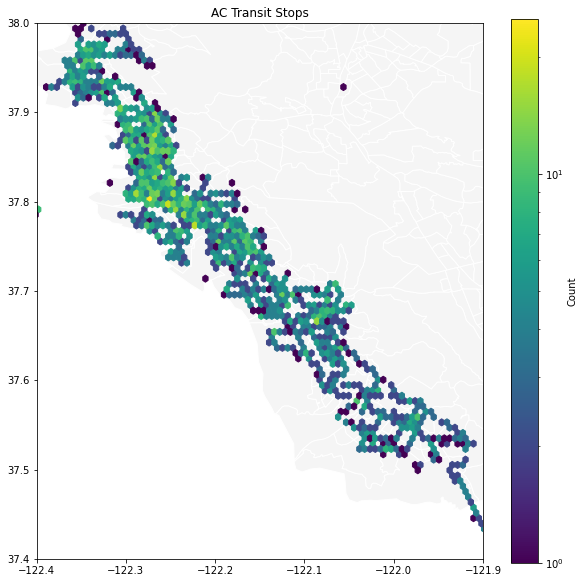

In [33]:
# plot static hexbin heatmap map of bus stops

fig, ax = plt.subplots(figsize=(10,10))

# Plot coastline using GeoPandas
ac_counties.plot(ax=ax, color='whitesmoke', edgecolor='white')

# Plot hexbins of bus stops using Matplotlib
hb = plt.hexbin(stops.stop_lon, stops.stop_lat, bins='log', mincnt=1, gridsize=90)

# Add a key
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')

# Title and bounds
ax.set_title('AC Transit Stops')
ax.set_xlim((-122.4, -121.9))
ax.set_ylim((37.4, 38.0))

plt.show()

#### Hexbin map of stops by time in Alameda County

In [34]:
stop_times.stop_id = stop_times.stop_id.astype(str)

In [35]:
stop_times = stop_times.merge(stops, on="stop_id", how="inner")

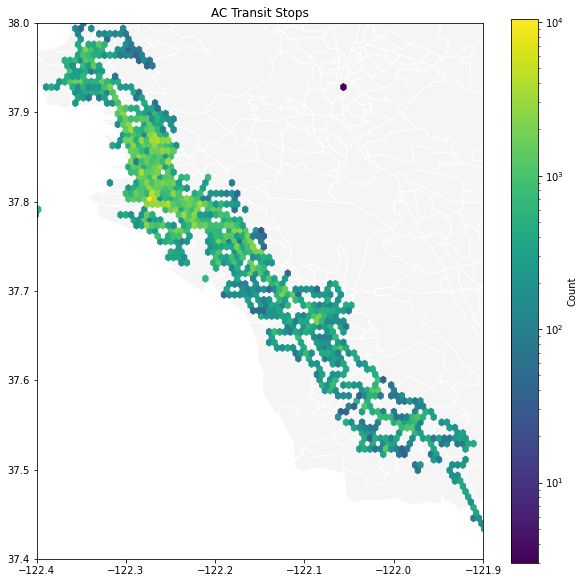

In [37]:
# plot static hexbin heatmap map of bus stops

fig, ax = plt.subplots(figsize=(10,10))

# Plot coastline using GeoPandas
ac_counties.plot(ax=ax, color='whitesmoke', edgecolor='white')

# Plot hexbins of bus stops using Matplotlib
hb = plt.hexbin(stop_times.stop_lon, stop_times.stop_lat, bins='log', mincnt=1, gridsize=90)

# Add a key
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')

# Title and bounds
ax.set_title('AC Transit Stops')
ax.set_xlim((-122.4, -121.9))
ax.set_ylim((37.4, 38.0))

plt.show()

#### More stuff

In [12]:
# force all stop_id values to string to avoid errors
stop_times.stop_id = stop_times.stop_id.astype(str)

# add stop info to stop_times
gtfs_df = stop_times.merge(stops, on="stop_id", how="inner")

# add trip info to stop_times, drop non-weekday trips
gtfs_df = gtfs_df.merge(trips, on="trip_id")
gtfs_df = gtfs_df[gtfs_df.service_id.str.contains("Weekday")].copy()

# add route info to stop_times
gtfs_df = gtfs_df.merge(routes, on="route_id")

In [13]:
# view resulting df
gtfs_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,timepoint,stop_code,stop_name,...,service_id,trip_headsign,direction_id,block_id,shape_id,route_short_name,route_long_name,route_desc,route_type,route_url
0,12318020,07:30:00,07:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
1,12318020,07:31:00,07:31:00,5875,2,0,0,0,52014.0,Shattuck Av & Allston Way (Transit Hub),...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
2,12318020,07:33:00,07:33:00,575,3,0,0,0,50400.0,Oxford St & University Av,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
3,12318020,07:34:00,07:34:00,787,4,0,0,0,58558.0,Hearst Av & Arch St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
4,12318020,07:35:00,07:35:00,511,5,0,0,0,55006.0,Hearst Av & Euclid Av,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN


In [14]:
# groupby stopname, return count of trips
gtfs_df.groupby(by=['stop_name']).trip_id.count()

stop_name
104th Av & Birch St            50
104th Av & Plymouth St         50
104th Av & Sunnyside St        50
105th Av & E St                50
105th Av & Edes Av             25
                               ..
Williams St & Westgate Pkwy    17
Willow St & Franciscan Way     70
Willow St & Shoreline Dr       70
Wood St & 12th St              65
Wood St & 8th St               65
Name: trip_id, Length: 2760, dtype: int64

In [22]:
unique_stops = gtfs_df['stop_id'].unique()

for i in unique_stops[:1]:
    temp = gtfs_df.loc[gtfs_df['stop_id']==i].copy()
    unique_trips = temp['trip_id'].unique()
    print(len(unique_trips) == len(temp))

True


In [24]:
temp

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,timepoint,stop_code,stop_name,...,service_id,trip_headsign,direction_id,block_id,shape_id,route_short_name,route_long_name,route_desc,route_type,route_url
0,12318020,07:30:00,07:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
35,10069020,08:30:00,08:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
70,8275020,09:30:00,09:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
105,2281020,10:30:00,10:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
140,10930020,11:30:00,11:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
175,10875020,12:30:00,12:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
210,3875020,13:30:00,13:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
245,385020,14:30:00,14:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
280,6627020,15:30:00,15:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN
315,6868020,16:30:00,16:30:00,278,1,0,0,1,57566.0,Addison St & Oxford St,...,2003CV-D2-Weekday-01,EUCLID,0,104049502,650092,65,Grizzly Peak - Euclid,NaN,3,NaN


## kepler.gl

* https://medium.com/vis-gl/introducing-kepler-gl-for-jupyter-f72d41659fbf

In [1]:
from keplergl import KeplerGl 
map_1 = KeplerGl(height=500)
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=500)

In [5]:
map_1.add_data(data=stops, name="gtfs_stops")

## Route Shapes

In [37]:
routes_gdf = gpd.read_file("zip://../data/Winter19Routeshape.zip")

In [38]:
routes_gdf = routes_gdf.merge(routes, left_on="PUB_RTE", right_on="route_id")
routes_gdf.head()

,PUB_RTE,geometry,route_id,route_short_name,route_long_name,route_desc,route_type,route_url
0,1,"MULTILINESTRING ((-122.16032 37.72164, -122.16...",1,1,International - E. 14th,NaN,3,NaN
1,10,"MULTILINESTRING ((-122.08505 37.67311, -122.08...",10,10,E. 14th St. - Mission,NaN,3,NaN
2,12,"MULTILINESTRING ((-122.27160 37.79420, -122.27...",12,12,Dtn. Oakland\Dtn. Berkeley\ Gilman St.,NaN,3,NaN
3,14,"MULTILINESTRING ((-122.22151 37.77270, -122.22...",14,14,14th St - San Antonio - High St,NaN,3,NaN
4,18,"MULTILINESTRING ((-122.26822 37.80903, -122.26...",18,18,Solano - Shattuck - MLK Jr.,NaN,3,NaN


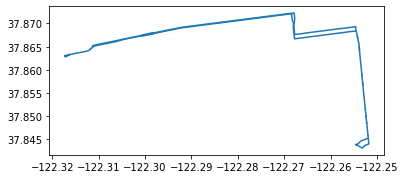

In [40]:
routes_gdf.loc[routes_gdf.route_id == "51B"].plot()

In [41]:
routes_gdf.loc[routes_gdf.route_id == "51B"]

,PUB_RTE,geometry,route_id,route_short_name,route_long_name,route_desc,route_type,route_url
28,51B,"MULTILINESTRING ((-122.25186 37.84528, -122.25...",51B,51B,University - College - Rockridge,NaN,3,NaN
